In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('crime.csv')
pd.set_option('display.max_columns',None)
df.head()

,State,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.0

In [3]:
df.shape

(1994, 128)

<AxesSubplot:>

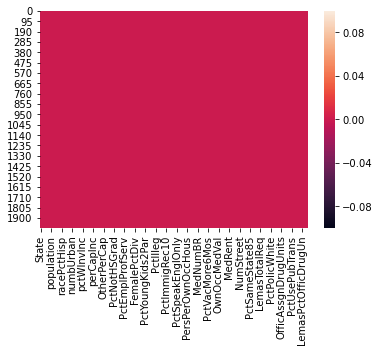

In [4]:
#we can see there are no missing values in the dataset which is false
# '?' is not considered as a missing value by the system.
sns.heatmap(df.isnull())

# Feature Engineering

In [5]:
#replacing ? in dataset to NAN
for col in df.columns:
    df[col]=df[col].replace('?',np.nan)

In [6]:
df.head()

,State,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.

# EDA by sweetviz library

In [7]:
import sweetviz

In [8]:
my_report=sweetviz.analyze([df,'df'],target_feat='ViolentCrimesPerPop')

:FEATURES DONE:                    |█████████████████████| [100%]   03:22  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:27  -> (00:00 left)


Creating Associations graph... DONE!


In [9]:
my_report.show_html('ViolentCrimesPerPop.html')

Report ViolentCrimesPerPop.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Feature Engineering part 2

In [10]:
for col in df.columns:
    print(col,df[col].isnull().sum())

#we can see in columns 50% of data and even more is missing.we can drop such columns

State 0
county 1174
community 1177
communityname 0
fold 0
population 0
householdsize 0
racepctblack 0
racePctWhite 0
racePctAsian 0
racePctHisp 0
agePct12t21 0
agePct12t29 0
agePct16t24 0
agePct65up 0
numbUrban 0
pctUrban 0
medIncome 0
pctWWage 0
pctWFarmSelf 0
pctWInvInc 0
pctWSocSec 0
pctWPubAsst 0
pctWRetire 0
medFamInc 0
perCapInc 0
whitePerCap 0
blackPerCap 0
indianPerCap 0
AsianPerCap 0
OtherPerCap 1
HispPerCap 0
NumUnderPov 0
PctPopUnderPov 0
PctLess9thGrade 0
PctNotHSGrad 0
PctBSorMore 0
PctUnemployed 0
PctEmploy 0
PctEmplManu 0
PctEmplProfServ 0
PctOccupManu 0
PctOccupMgmtProf 0
MalePctDivorce 0
MalePctNevMarr 0
FemalePctDiv 0
TotalPctDiv 0
PersPerFam 0
PctFam2Par 0
PctKids2Par 0
PctYoungKids2Par 0
PctTeen2Par 0
PctWorkMomYoungKids 0
PctWorkMom 0
NumIlleg 0
PctIlleg 0
NumImmig 0
PctImmigRecent 0
PctImmigRec5 0
PctImmigRec8 0
PctImmigRec10 0
PctRecentImmig 0
PctRecImmig5 0
PctRecImmig8 0
PctRecImmig10 0
PctSpeakEnglOnly 0
PctNotSpeakEnglWell 0
PctLargHouseFam 0
PctLargHouseOccu

In [11]:
#dropping columns having more than 50% missing values(1994/2==1000)
df=df.dropna(thresh=1000,axis=1)
df.shape

(1994, 104)

In [12]:
#According to dataset description except the column communityname all other variables are numerical type.
#but we can see this is false(OtherPerCap is object data types)
for col in df.columns:
    print(col,df[col].dtypes)


State int64
communityname object
fold int64
population float64
householdsize float64
racepctblack float64
racePctWhite float64
racePctAsian float64
racePctHisp float64
agePct12t21 float64
agePct12t29 float64
agePct16t24 float64
agePct65up float64
numbUrban float64
pctUrban float64
medIncome float64
pctWWage float64
pctWFarmSelf float64
pctWInvInc float64
pctWSocSec float64
pctWPubAsst float64
pctWRetire float64
medFamInc float64
perCapInc float64
whitePerCap float64
blackPerCap float64
indianPerCap float64
AsianPerCap float64
OtherPerCap object
HispPerCap float64
NumUnderPov float64
PctPopUnderPov float64
PctLess9thGrade float64
PctNotHSGrad float64
PctBSorMore float64
PctUnemployed float64
PctEmploy float64
PctEmplManu float64
PctEmplProfServ float64
PctOccupManu float64
PctOccupMgmtProf float64
MalePctDivorce float64
MalePctNevMarr float64
FemalePctDiv float64
TotalPctDiv float64
PersPerFam float64
PctFam2Par float64
PctKids2Par float64
PctYoungKids2Par float64
PctTeen2Par float64
Pc

In [13]:
#changing the data type to numerical 
for col in df.columns:
    if col=='communityname':
        pass
    else:
        
        df[col]=df[col].apply(pd.to_numeric)

In [14]:
for col in df.columns:
    print(col,df[col].dtypes)


State int64
communityname object
fold int64
population float64
householdsize float64
racepctblack float64
racePctWhite float64
racePctAsian float64
racePctHisp float64
agePct12t21 float64
agePct12t29 float64
agePct16t24 float64
agePct65up float64
numbUrban float64
pctUrban float64
medIncome float64
pctWWage float64
pctWFarmSelf float64
pctWInvInc float64
pctWSocSec float64
pctWPubAsst float64
pctWRetire float64
medFamInc float64
perCapInc float64
whitePerCap float64
blackPerCap float64
indianPerCap float64
AsianPerCap float64
OtherPerCap float64
HispPerCap float64
NumUnderPov float64
PctPopUnderPov float64
PctLess9thGrade float64
PctNotHSGrad float64
PctBSorMore float64
PctUnemployed float64
PctEmploy float64
PctEmplManu float64
PctEmplProfServ float64
PctOccupManu float64
PctOccupMgmtProf float64
MalePctDivorce float64
MalePctNevMarr float64
FemalePctDiv float64
TotalPctDiv float64
PersPerFam float64
PctFam2Par float64
PctKids2Par float64
PctYoungKids2Par float64
PctTeen2Par float64
P

In [15]:
df.describe()

,State,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1993.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.391224,0.441339,0.461244,0.434453,0.487568,0.494273,0.487748,0.610918,0.620657,0.664032,0.582884,0.501449,0.526690,0.036294,0.249995,0.030060,0.320211,0.360622,0.399077,0.427879,0.181364,0.182126,0.184774,0.182879,0.785903,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.191008,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.198922,0.186292,0.182460,0.175437,0.175170,0.183607,0.154594,0.201976,0.206353,0.218749,0.191507,0.168612,0.175

# imputing missing values

In [16]:
#All features with missing values have more than thresh=1000,so all are deleted from the dataset.
#Only the feature 'OtherPerCap' has missing value after code of removing feature with more than 50% missing values.
df['OtherPerCap']=df['OtherPerCap'].fillna(df['OtherPerCap'].mean())

<AxesSubplot:>

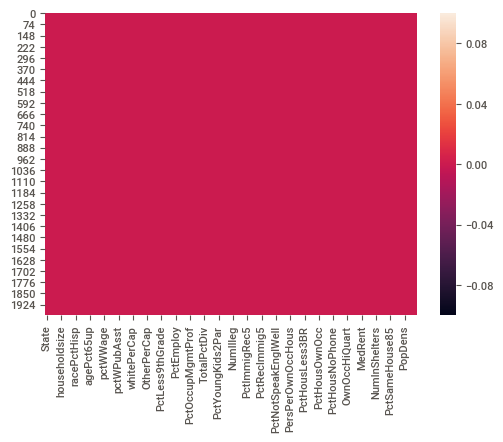

In [17]:
sns.heatmap(df.isnull())

# Dropping unnecessary column(communityname) 

In [18]:
#Dropping columns which are unnecessary for model building.
df=df.drop(['communityname','State','fold'],axis=1)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


# Separating target and independent variables

In [19]:
y=df[['ViolentCrimesPerPop']]
x=df.drop('ViolentCrimesPerPop',axis=1)

# Feature Selection by PCA

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
xpca_50=pca.fit_transform(x)
xpca_50.shape

(1994, 50)

<AxesSubplot:>

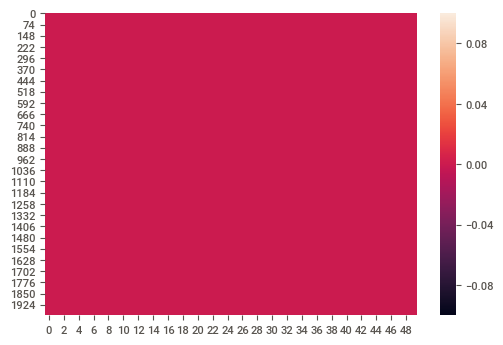

In [21]:
x=pd.DataFrame(xpca_50)
sns.heatmap(x.isnull())

In [22]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.343830,-0.278545,-0.564356,0.101899,-0.472034,-0.435889,-0.173543,0.040627,0.244384,-0.065507,-0.209424,0.139181,0.011052,0.044742,-0.075667,-0.258526,0.040816,-0.203307,0.071930,0.070283,0.179170,-0.025948,0.149445,-0.076041,-0.004832,0.004348,-0.067585,0.136989,0.001441,-0.065751,0.017387,0.003513,0.012621,-0.047217,0.072933,-0.030380,0.092138,0.034260,-0.008293,0.009309,-0.044267,0.017519,-0.012165,0.049414,0.067442,-0.056058,0.075555,0.075528,0.062627,-0.044208
1,-0.164080,0.271347,-0.964026,0.236183,-0.187662,-0.780585,-0.088610,-0.619260,0.009594,0.091250,-0.280647,-0.172429,-0.392015,0.182309,-0.205746,0.021542,0.026600,0.036563,-0.093721,0.045723,-0.238760,-0.022688,-0.108283,-0.071485,0.192925,-0.066578,0.009810,0.105084,-0.044445,-0.254085,0.049058,-0.121936,0.173264,-0.165354,0.180309,-0.121675,0.172420,-0.182909,-0.028652,-0.138152,0.011889,-0.001029,0.082111,0.067436,-0.084843,-0.077786,-0.014443,0.105378,0.008692,0.011899
2,-0.606931,-0.512729,0.071695,-0.025020,0.023481,0.028555,-0.701773,-0.363258,-0.002227,-0.370454,-0.328597,-0.004819,0.323331,0.372972,0.006344,-0.036172,0.059420,0.100561,0.036717,-0.014049,0.138937,0.244859,0.078329,0.010519,0.027745,-0.205124,0.044682,-0.131762,0.068294,0.007491,0.122350,-0.064948,0.065555,0.120466,-0.041060,-0.083707,-0.013712,0.020320,0.037315,0.001196,-0.188598,-0.094405,0.058174,-0.141977,0.064214,-0.034316,0.055866,-0.013453,-0.047671,0.022132
3,0.590535,0.294131,0.433359,-0.307915,-1.053582,0.726154,-0.493947,-0.272616,-0.526734,-0.244458,0.305333,0.187066,0.717583,0.169512,-0.364753,-0.097714,0.151238,0.505854,-0.217943,-0.218974,0.030929,0.044072,0.153900,0.096941,-0.076151,-0.284956,-0.265301,0.090574,0.143930,0.147640,0.304766,-0.015696,-0.141679,0.165828,0.189707,-0.086470,-0.149055,0.205541,-0.184091,-0.078436,0.014455,0.126965,-0.092762,0.001888,-0.134281,0.016539,-0.075487,0.116333,-0.149407,-0.103431
4,1.029253,-0.702463,0.555105,-0.095140,-0.332690,-0.147362,0.071895,0.042862,-0.015609,0.055601,0.002062,-0.012595,0.120421,0.089846,0.376996,0.296492,0.048403,0.158397,-0.038655,0.129441,-0.210962,0.092956,0.155121,0.112239,0.028692,0.008603,0.046886,-0.126367,-0.034730,0.048220,-0.131513,-0.151687,-0.158846,-0.067498,0.039089,0.068991,0.120573,0.065397,0.094038,0.092659,-0.097549,0.038266,0.088292,-0.107858,-0.031290,-0.064980,-0.101302,0.064071,0.035705,0.011160


# Removing skewness by power transformer technique

In [23]:

x.skew()

0     0.194463
1     1.386590
2     0.307770
3     0.772845
4    -0.059937
5     0.373146
6     0.192261
7     0.317264
8     1.759964
9     0.041844
10    0.300071
11    0.245017
12   -0.002557
13    0.288588
14    0.418000
15   -0.191066
16    0.757505
17    0.313849
18    0.035476
19    0.340111
20    0.271264
21   -0.168034
22   -0.072958
23    0.310811
24   -0.017098
25    0.183447
26    0.110884
27   -0.057146
28    0.346783
29   -0.288487
30   -0.161191
31    0.325758
32    0.113597
33   -0.066550
34   -0.002939
35    0.168380
36   -0.022817
37    0.032499
38   -0.079205
39    0.028458
40    0.276762
41    0.087189
42    0.206600
43    0.126804
44   -0.290325
45    0.037611
46    0.225304
47    0.004968
48    0.179129
49   -0.081671
dtype: float64

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x_transform=pt.fit_transform(x)
x=pd.DataFrame(x_transform)

In [25]:
x.skew()

0     0.012141
1     0.069523
2     0.014559
3    -0.000552
4    -0.000713
5    -0.030657
6     0.007988
7    -0.016884
8    -0.129916
9    -0.007845
10   -0.014774
11   -0.002211
12    0.003555
13   -0.000979
14   -0.012381
15    0.053680
16   -0.058022
17   -0.012852
18    0.003893
19   -0.023553
20   -0.019187
21    0.016621
22    0.006048
23   -0.016464
24    0.009857
25   -0.007836
26    0.000781
27   -0.000441
28   -0.026367
29    0.019268
30    0.016099
31   -0.022295
32   -0.004480
33    0.008306
34    0.002542
35   -0.011072
36    0.002759
37   -0.001683
38    0.002414
39   -0.002208
40   -0.010496
41   -0.006707
42   -0.012864
43   -0.004429
44    0.047512
45    0.001935
46   -0.019703
47    0.001407
48   -0.016580
49    0.007233
dtype: float64

# Data Scaling

In [26]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=x.columns)


In [27]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.374798,-0.112654,-0.990481,0.305882,-1.096069,-1.125556,-0.456966,0.168863,0.952785,-0.231386,-0.877909,0.620568,0.047609,0.250079,-0.320458,-1.357812,0.312568,-1.212267,0.436390,0.474755,1.129346,-0.186642,0.973583,-0.483481,-0.037912,0.053237,-0.517647,1.093797,0.052316,-0.580429,0.127211,0.074021,0.127625,-0.448700,0.701362,-0.276601,0.947306,0.365787,-0.103784,0.106510,-0.481094,0.217093,-0.129019,0.643427,0.883066,-0.769119,1.098877,1.130038,0.968620,-0.713186
1,-0.112426,0.629095,-1.760913,0.545346,-0.447457,-2.170508,-0.214336,-1.997492,0.165638,0.335891,-1.209288,-0.722378,-1.717169,0.854588,-1.021998,0.094327,0.234806,0.258967,-0.560122,0.326502,-1.562584,-0.165726,-0.711104,-0.451260,1.374825,-0.490308,0.093259,0.835200,-0.333857,-2.010869,0.401061,-1.079955,1.509757,-1.530989,1.736366,-1.200274,1.782578,-1.944616,-0.324187,-1.521823,0.172155,-0.001573,1.016521,0.869012,-1.110472,-1.069791,-0.188628,1.576152,0.150353,0.181125
2,-0.560183,-0.545274,0.163076,0.064684,0.041469,0.134993,-2.047264,-1.113947,0.120923,-1.346788,-1.437007,0.018374,1.418554,1.640716,0.093678,-0.212459,0.412665,0.618626,0.225422,-0.043329,0.889790,1.612435,0.502064,0.113924,0.193831,-1.586447,0.364360,-1.049173,0.593258,0.023918,1.047285,-0.542143,0.589985,1.127935,-0.395692,-0.811701,-0.145244,0.218881,0.394971,0.017529,-2.303766,-1.118310,0.731296,-1.859616,0.839009,-0.468894,0.823953,-0.200860,-0.729388,0.345998
3,0.602223,0.652842,0.772012,-0.530528,-2.395576,1.710098,-1.406133,-0.813505,-2.444830,-0.884196,1.261485,0.814426,3.153203,0.799784,-1.951438,-0.535020,0.881091,2.647597,-1.313899,-1.411016,0.227422,0.266736,1.003283,0.679873,-0.543857,-2.237560,-2.133030,0.717958,1.176931,1.266864,2.727554,-0.095543,-1.261987,1.562553,1.827031,-0.839770,-1.527282,2.155832,-1.964750,-0.859662,0.201260,1.486988,-1.157401,0.040384,-1.722422,0.230763,-1.108887,1.739825,-2.380791,-1.640208
4,0.995745,-0.948046,0.970741,-0.075546,-0.779520,-0.320510,0.232614,0.175536,0.069616,0.207273,0.055165,-0.015039,0.527398,0.452146,1.726268,1.611696,0.353616,0.932985,-0.227714,0.823605,-1.369268,0.588291,1.011424,0.777119,0.200577,0.085451,0.381406,-1.006934,-0.251070,0.373406,-1.116860,-1.369635,-1.420319,-0.636097,0.375456,0.686711,1.242518,0.693222,1.024820,1.016582,-1.129968,0.460467,1.089576,-1.399074,-0.428942,-0.892501,-1.509529,0.958759,0.562967,0.169239


# EDA

# Univariate Analysis

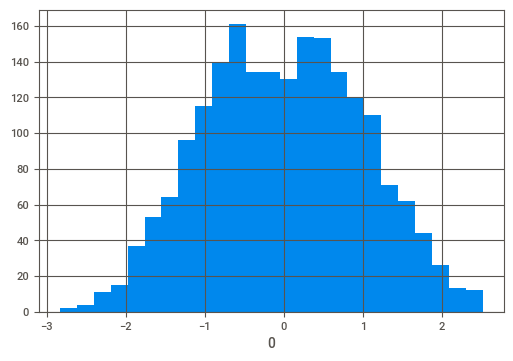

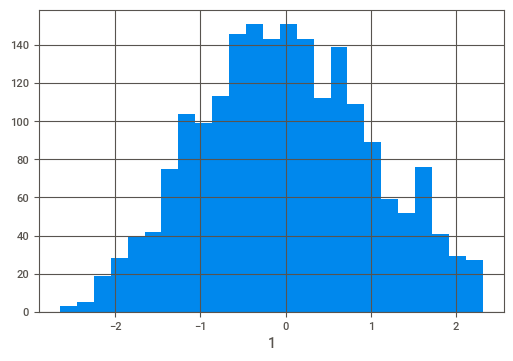

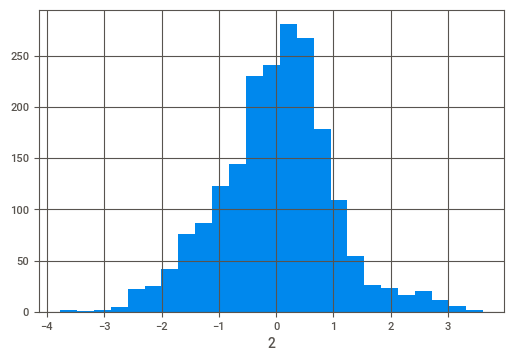

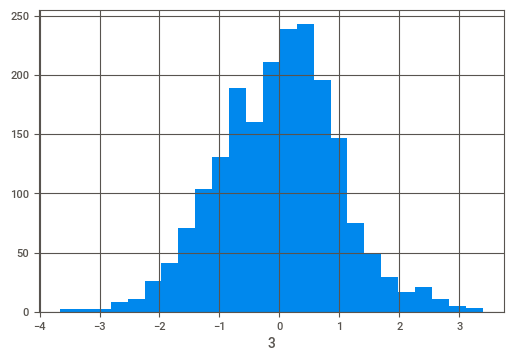

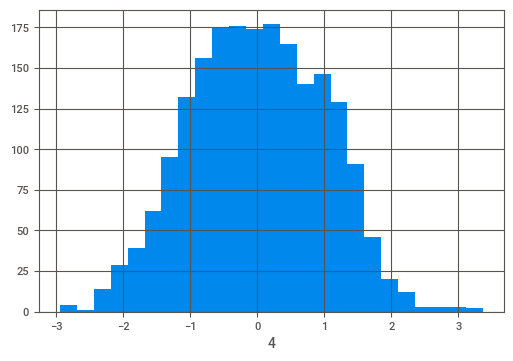

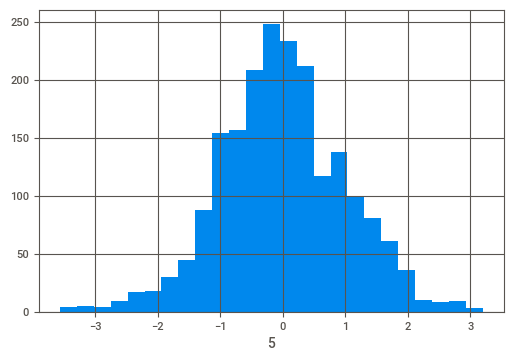

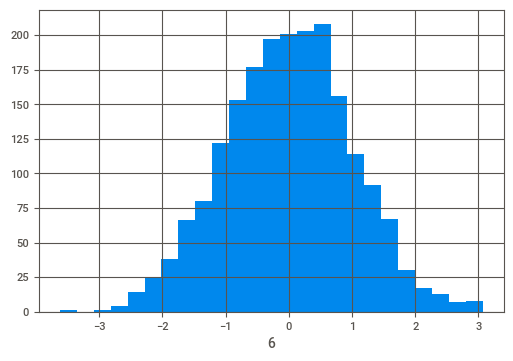

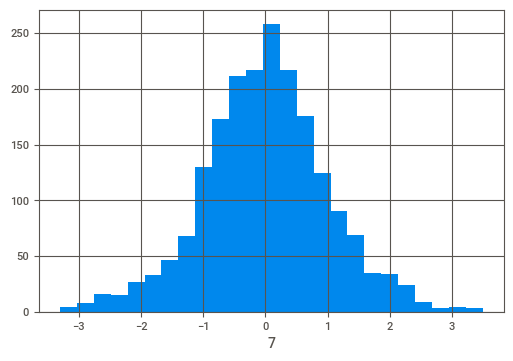

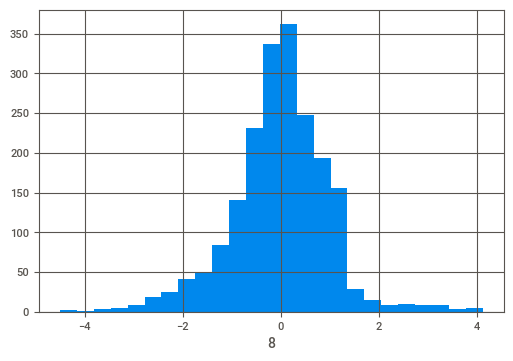

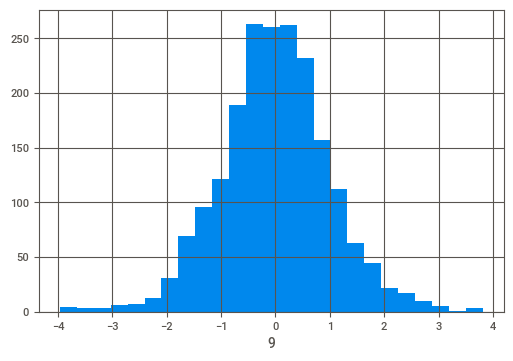

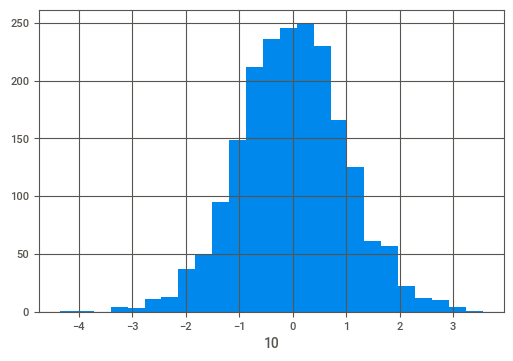

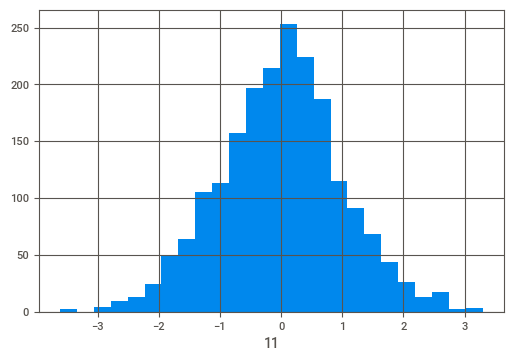

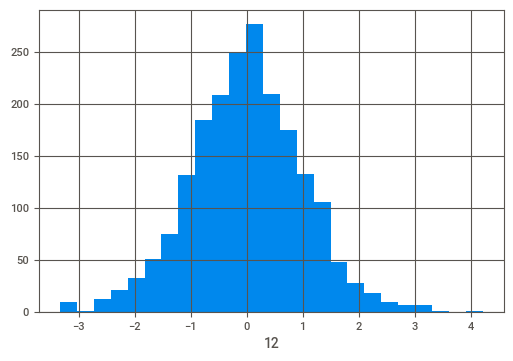

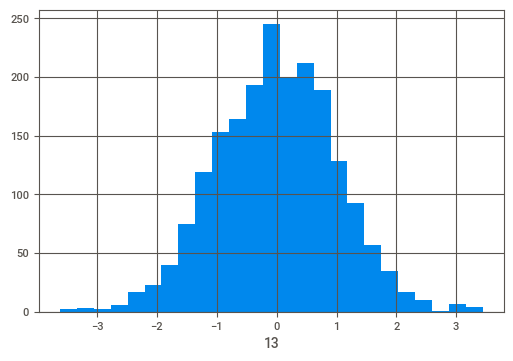

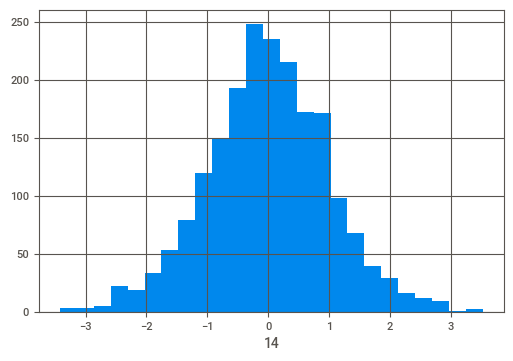

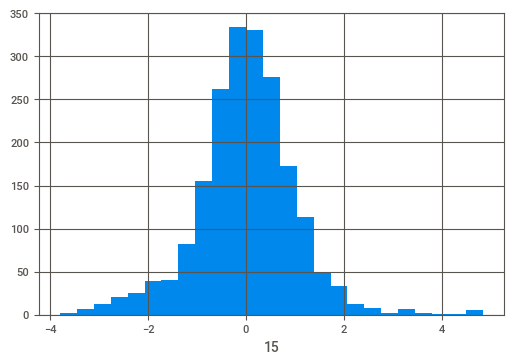

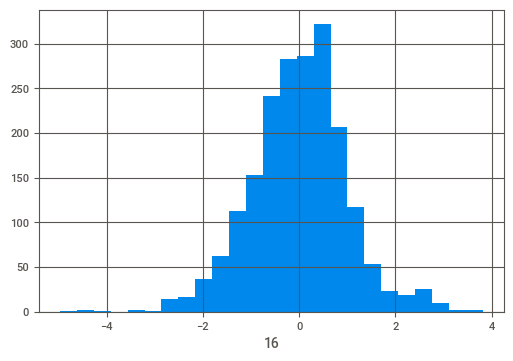

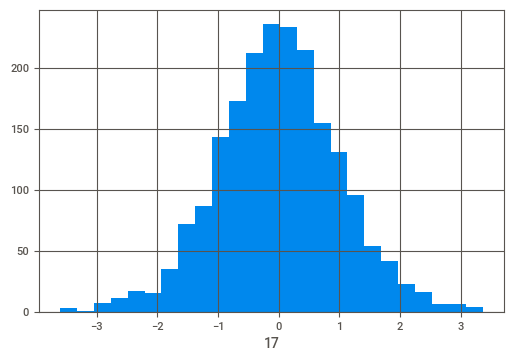

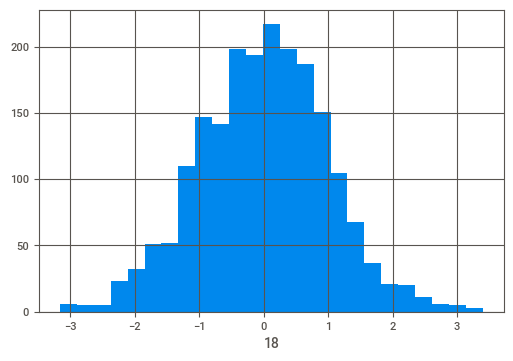

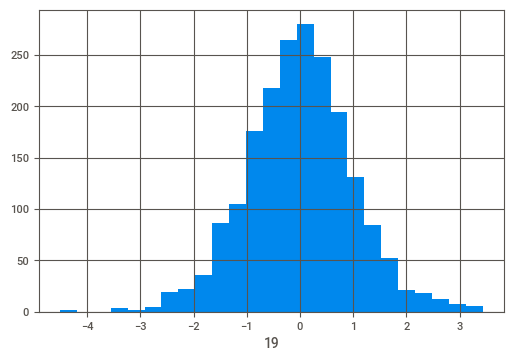

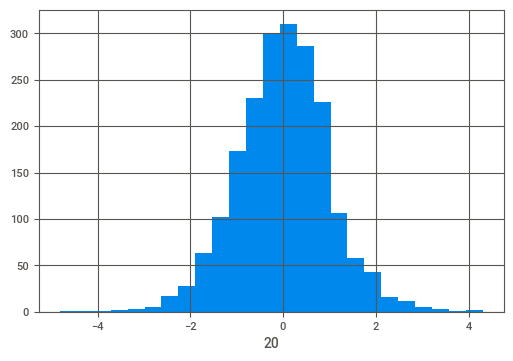

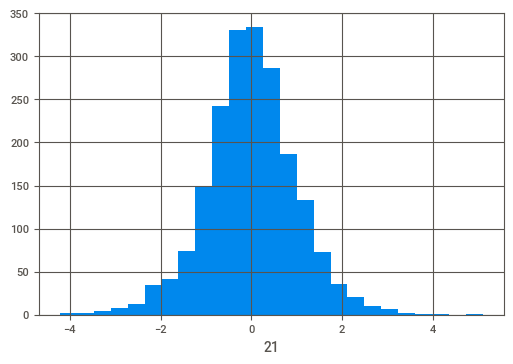

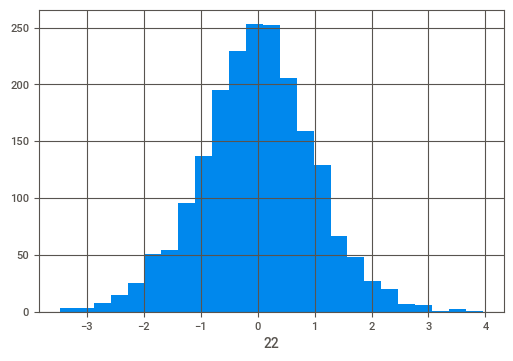

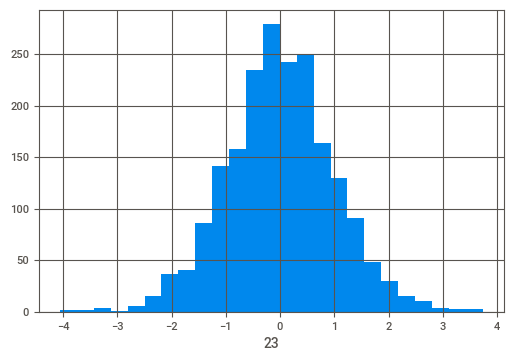

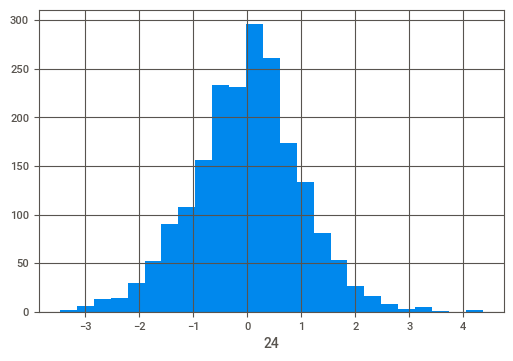

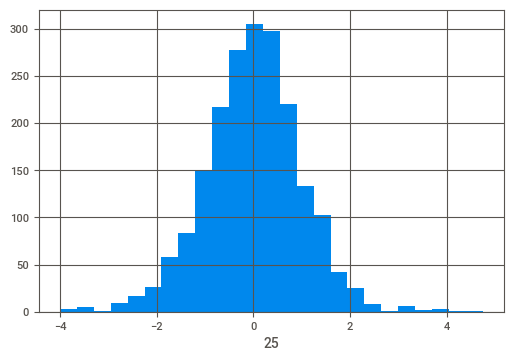

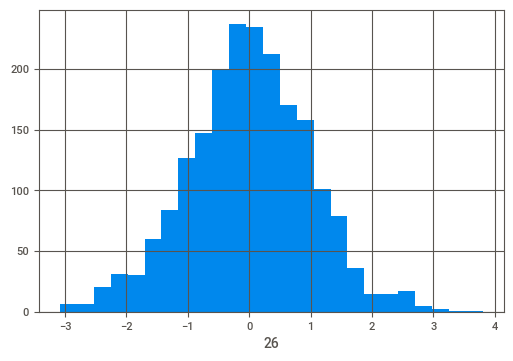

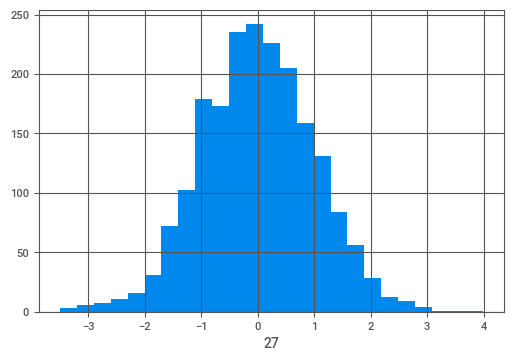

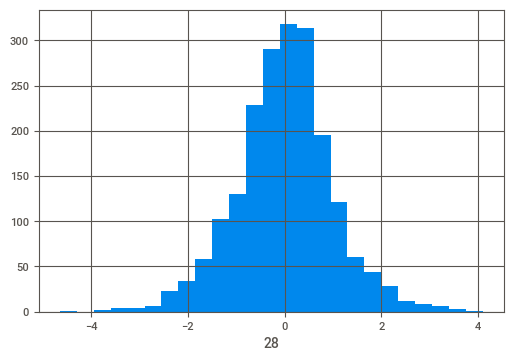

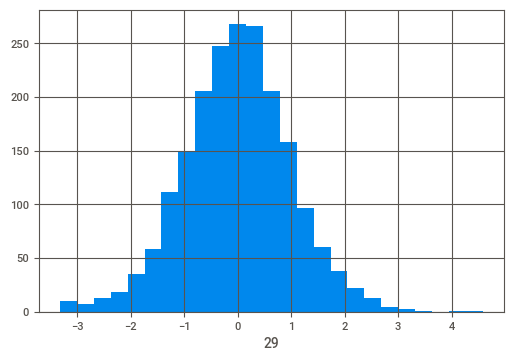

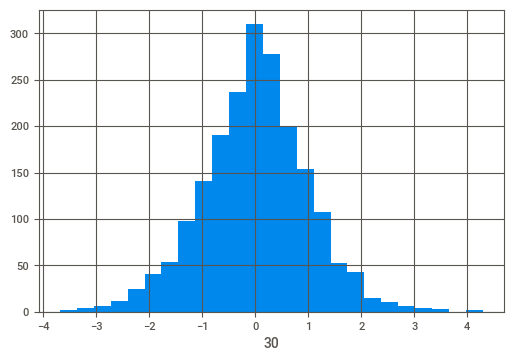

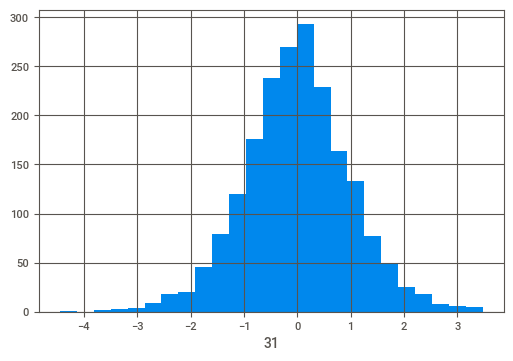

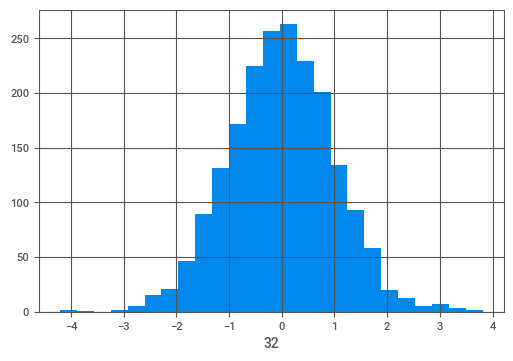

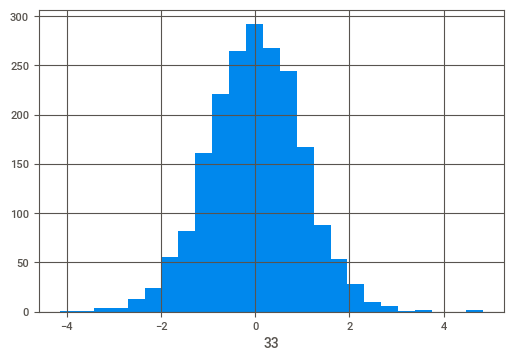

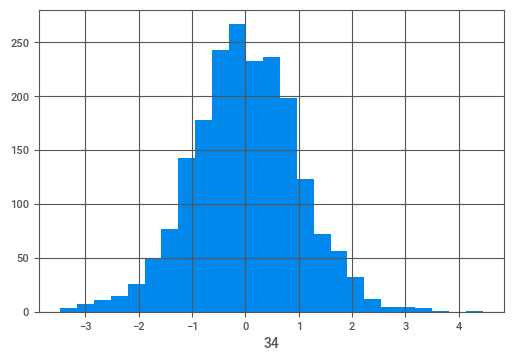

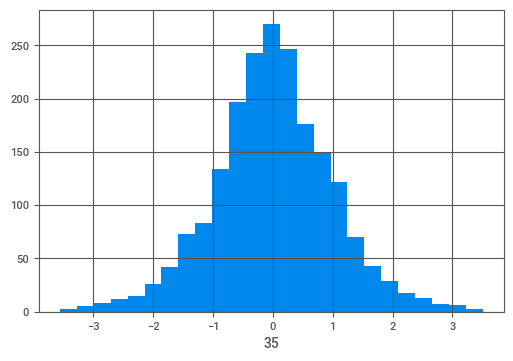

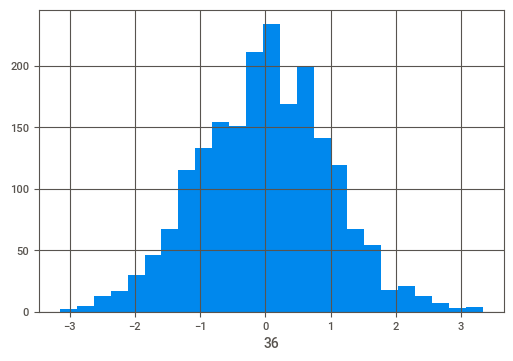

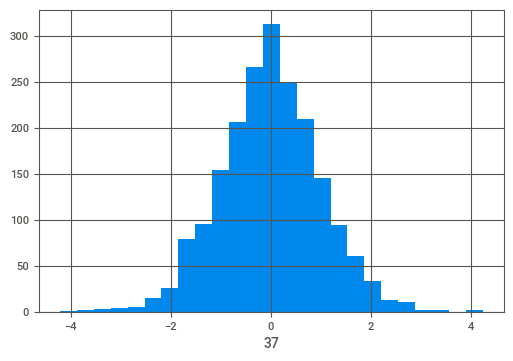

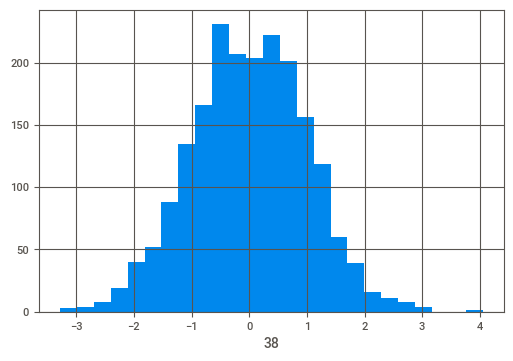

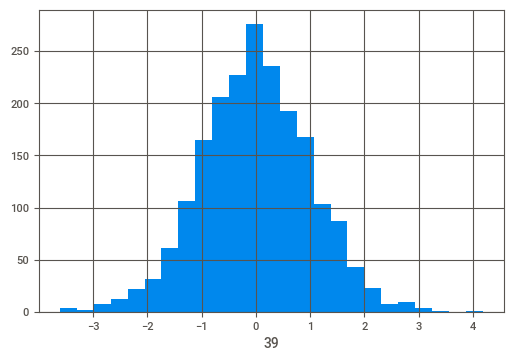

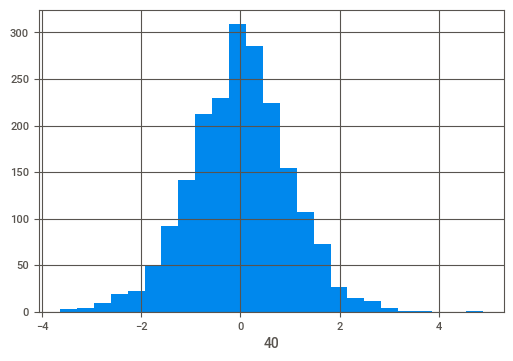

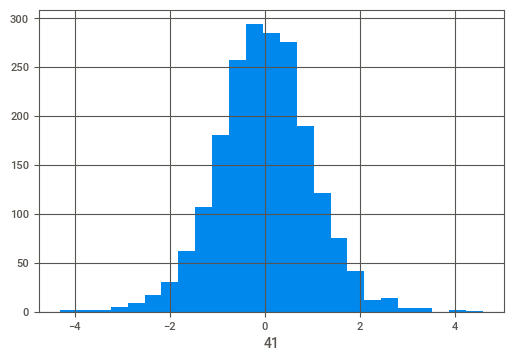

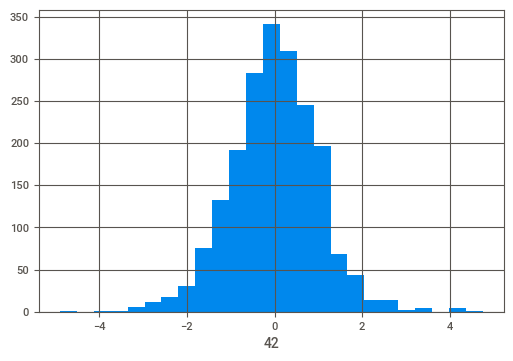

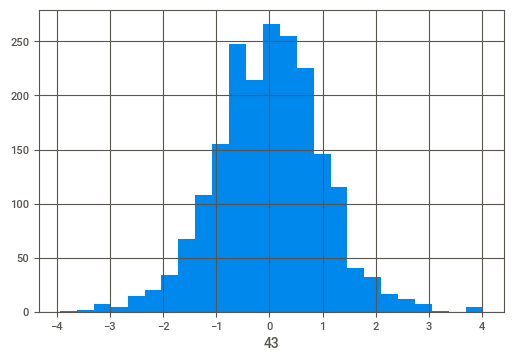

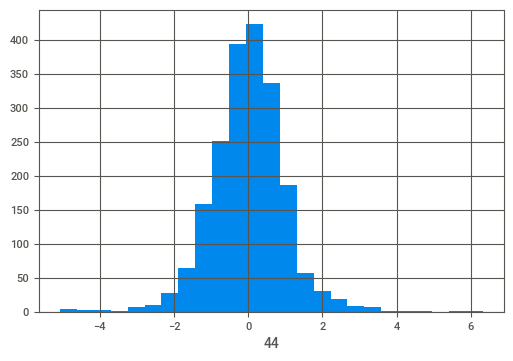

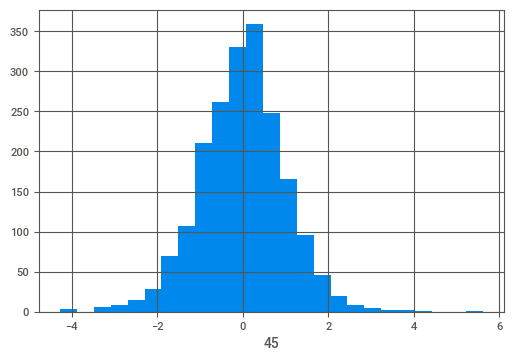

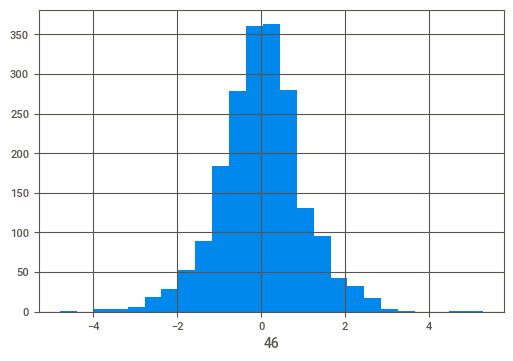

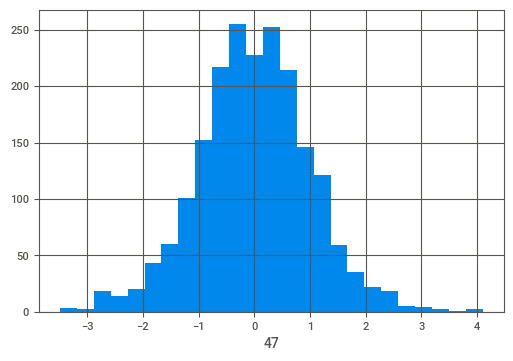

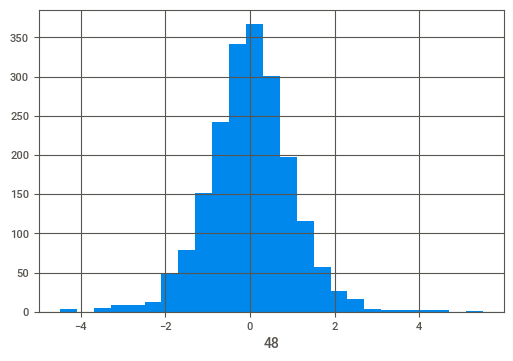

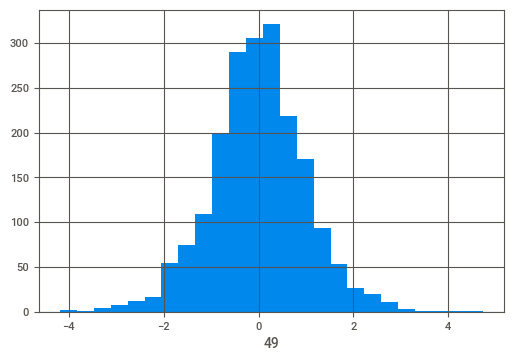

In [28]:
#checking skewness
numerical_features=[feature for feature in x.columns if x[feature].dtypes!='object']
for feature in numerical_features:
    
    x[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

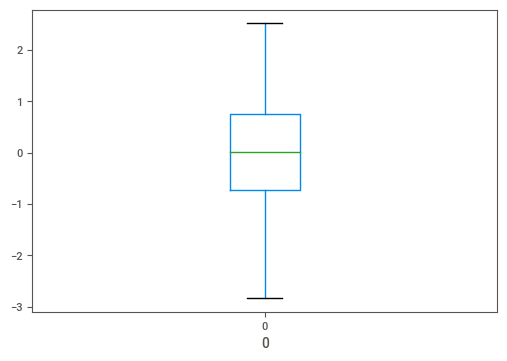

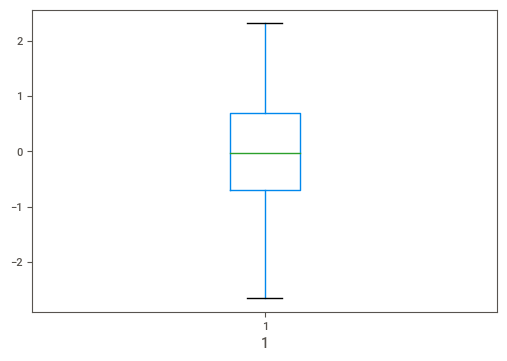

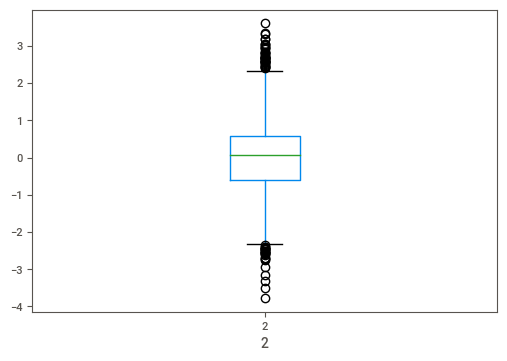

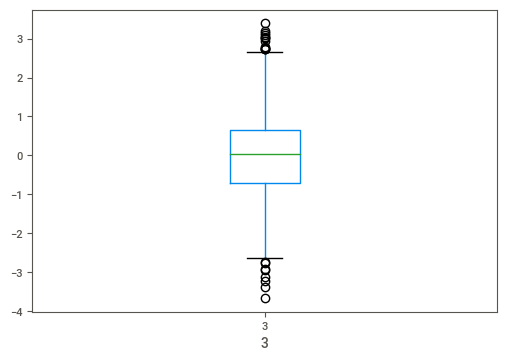

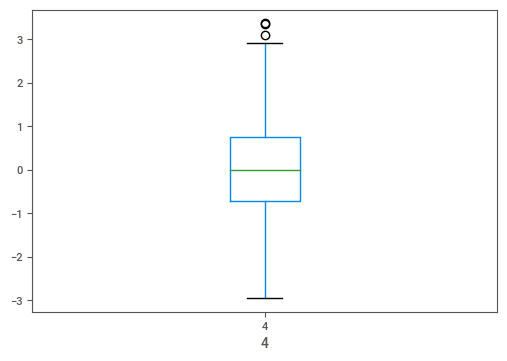

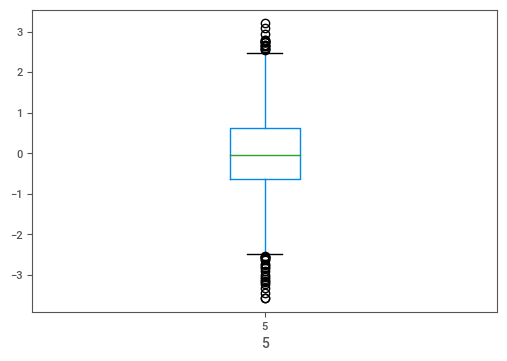

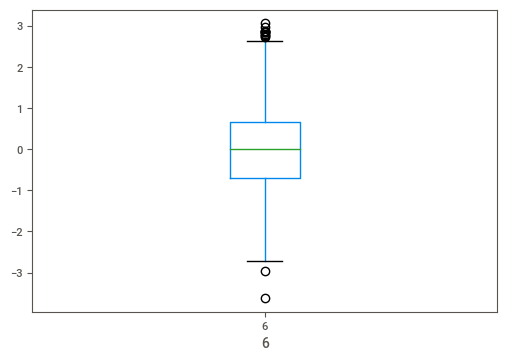

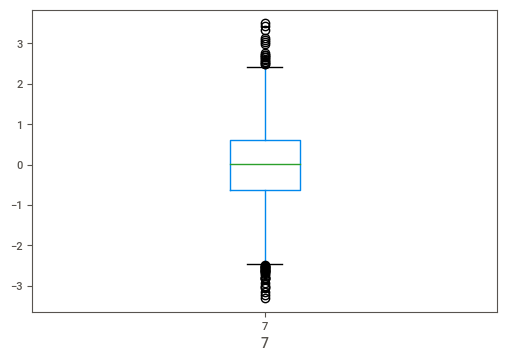

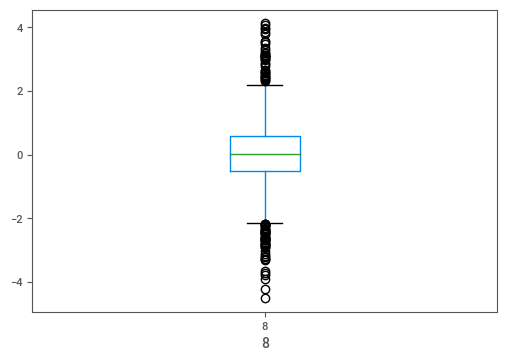

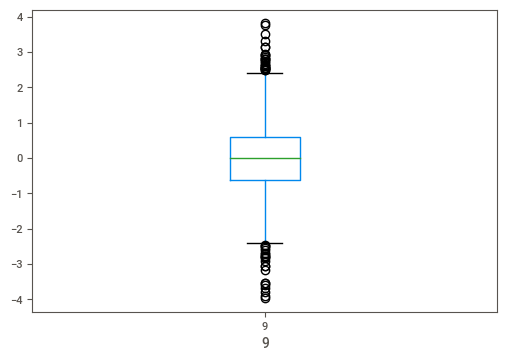

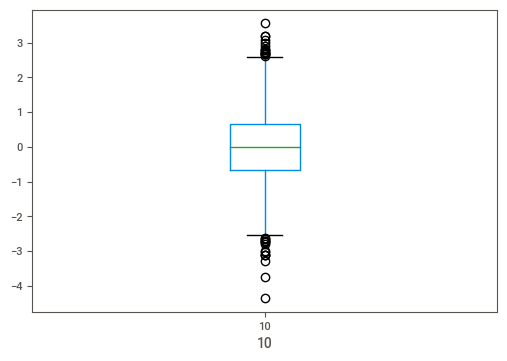

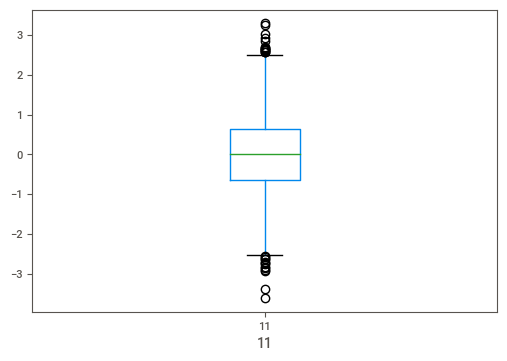

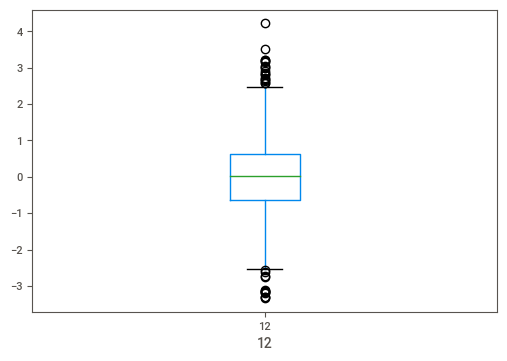

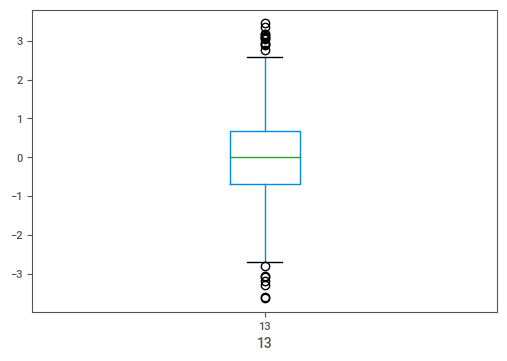

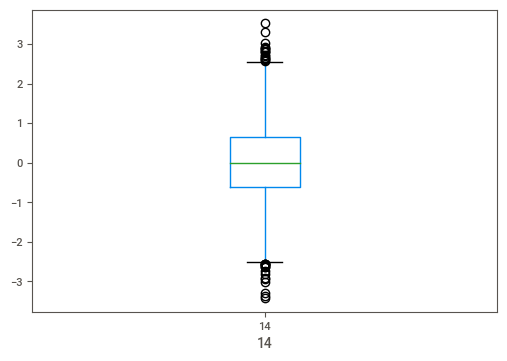

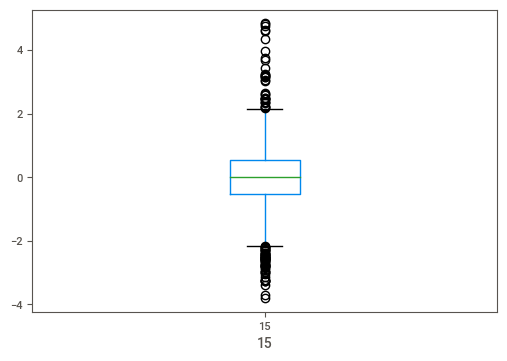

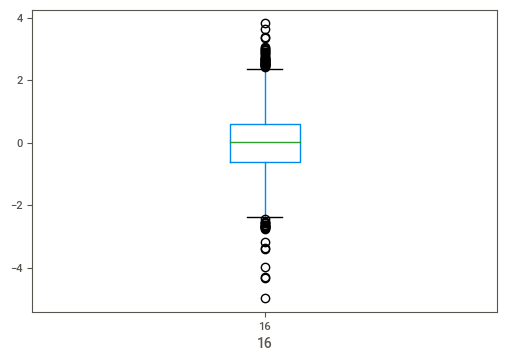

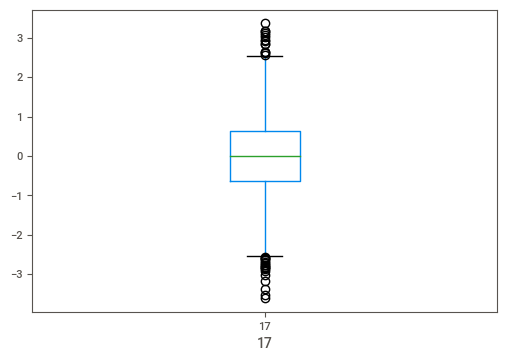

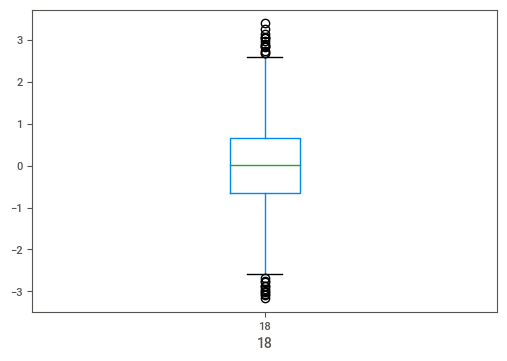

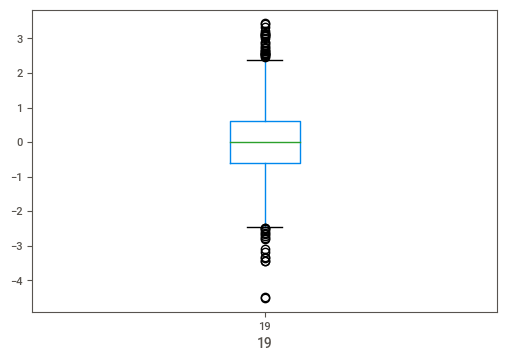

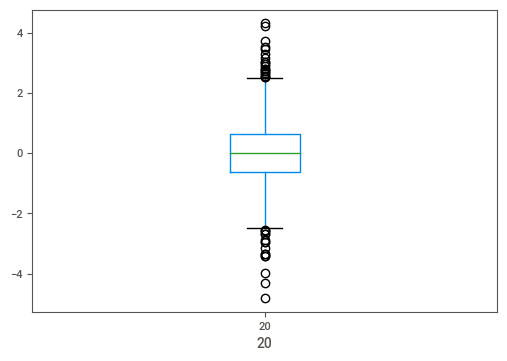

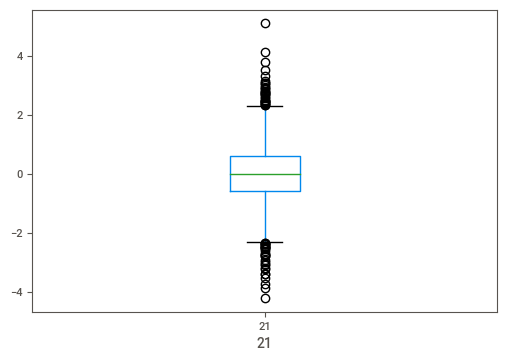

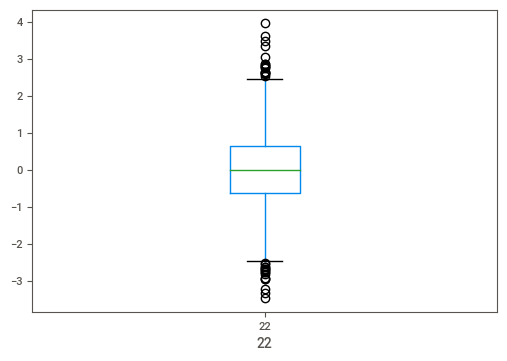

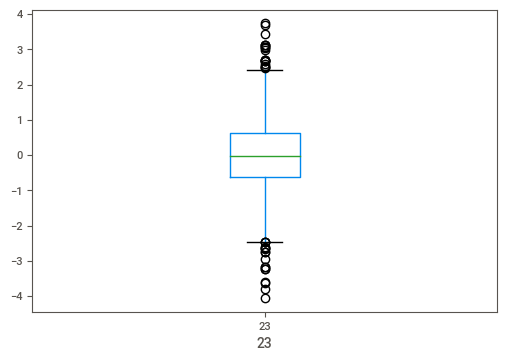

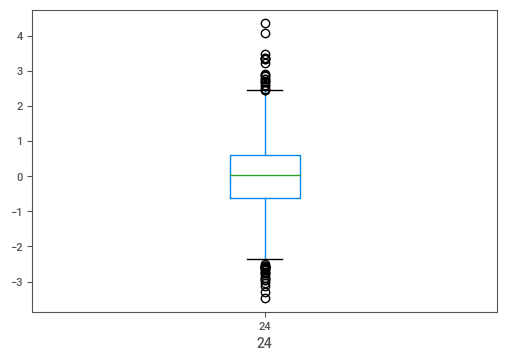

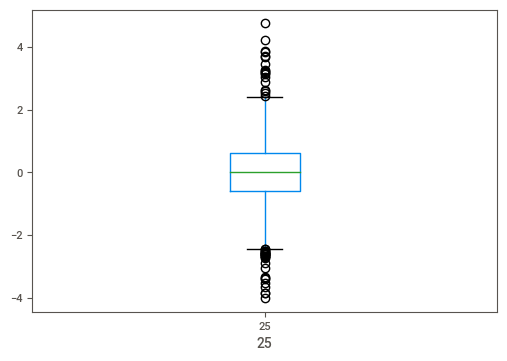

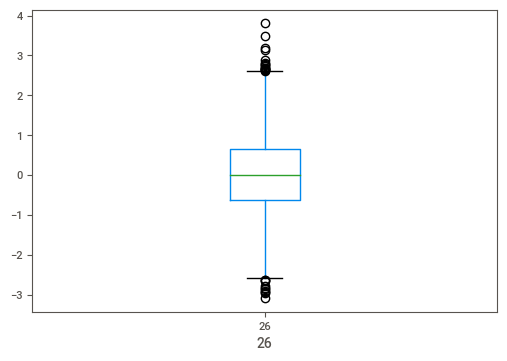

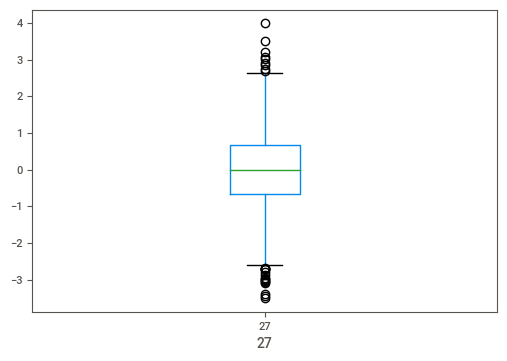

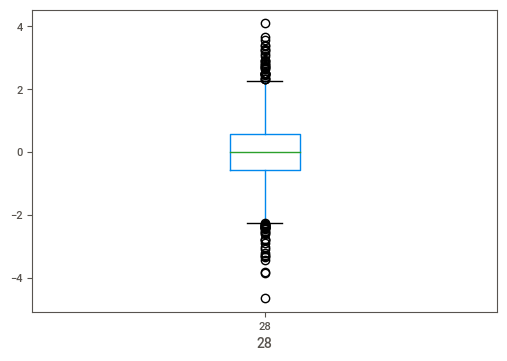

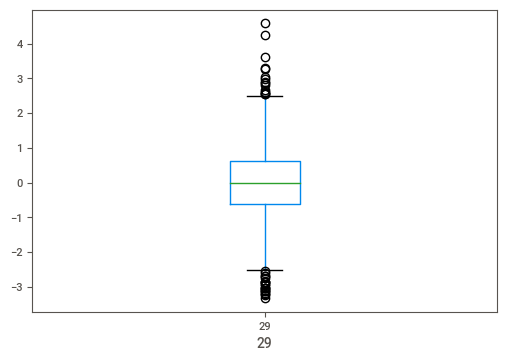

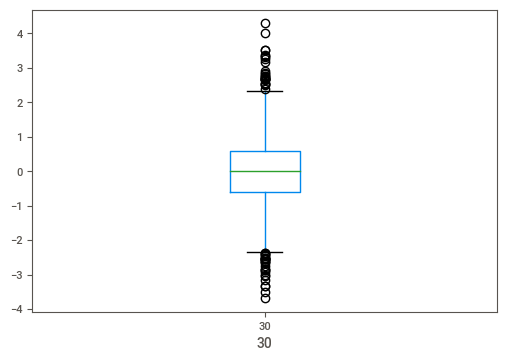

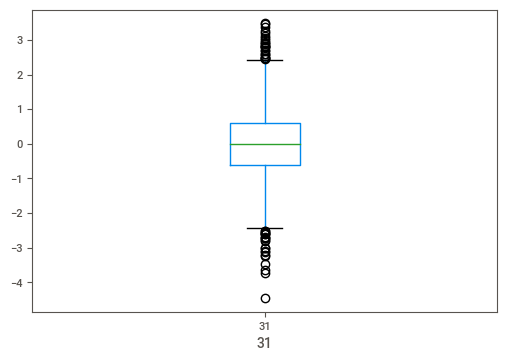

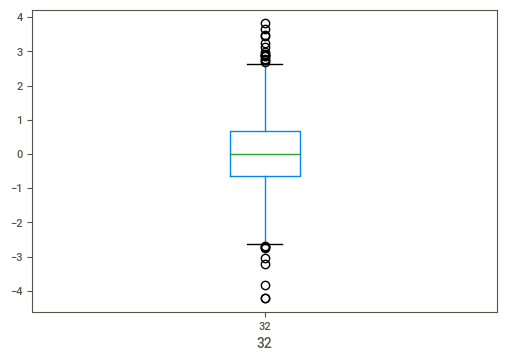

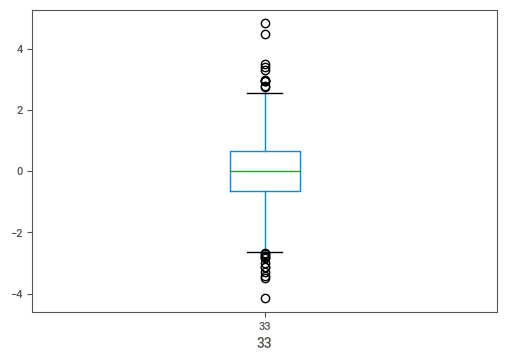

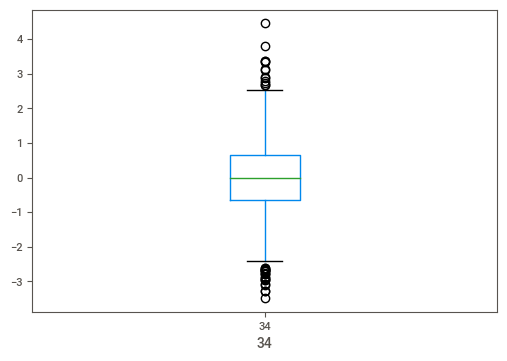

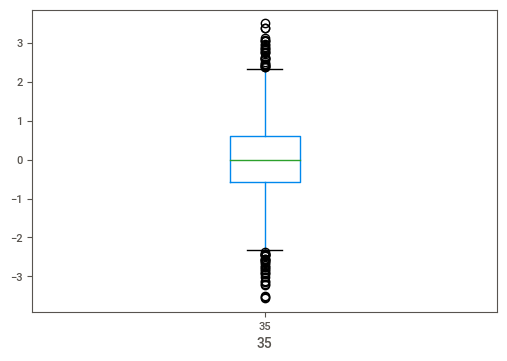

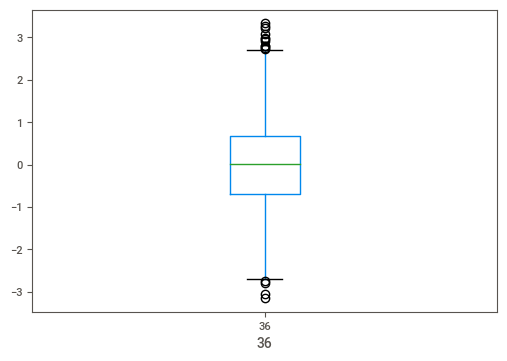

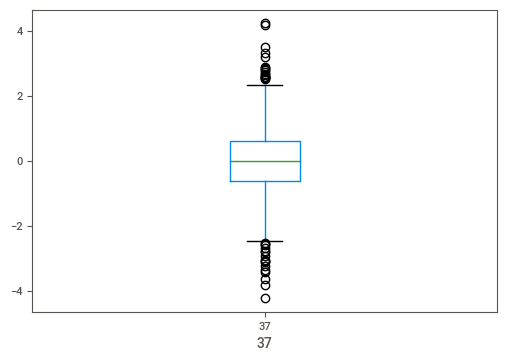

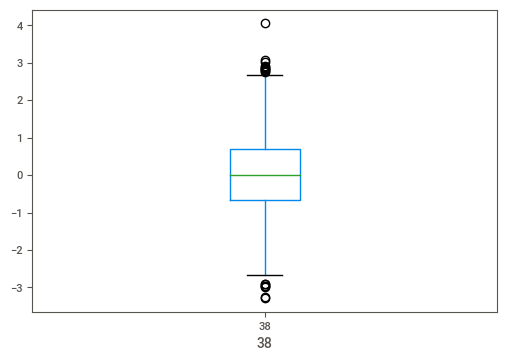

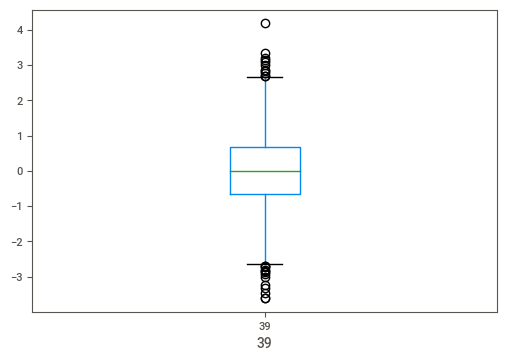

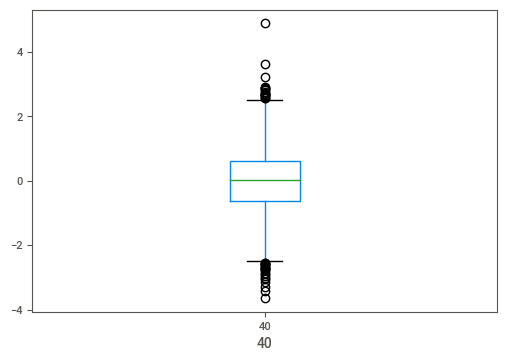

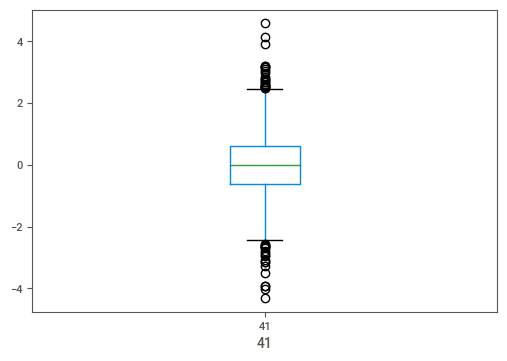

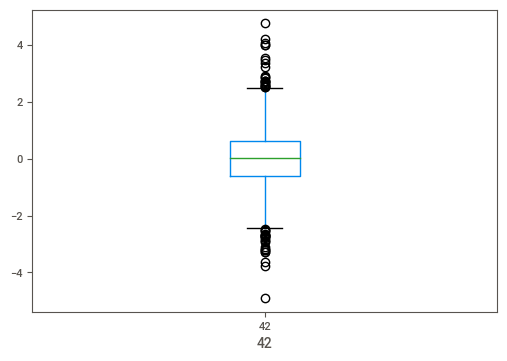

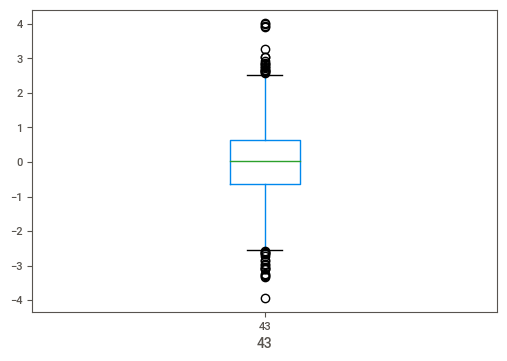

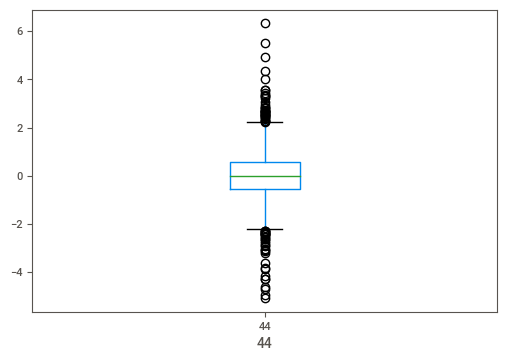

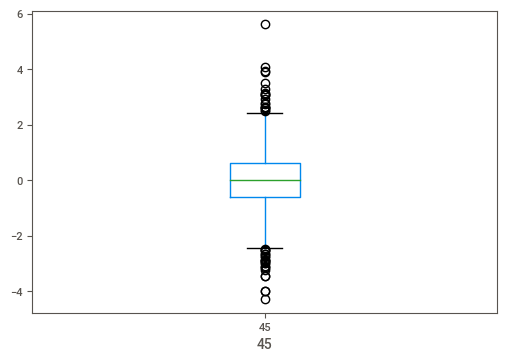

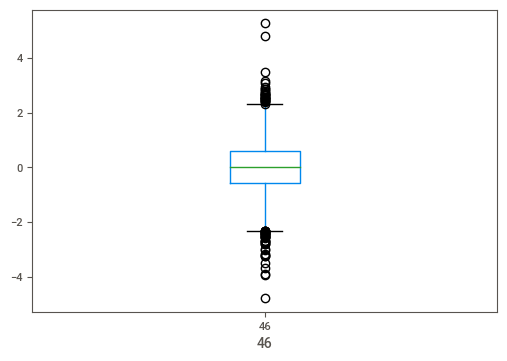

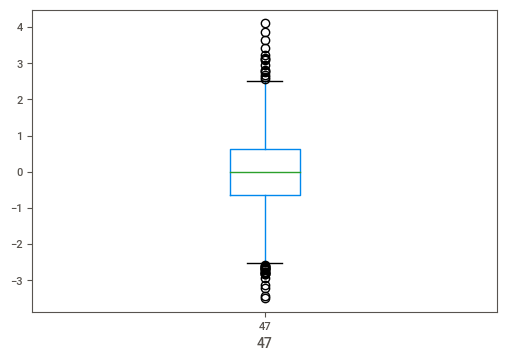

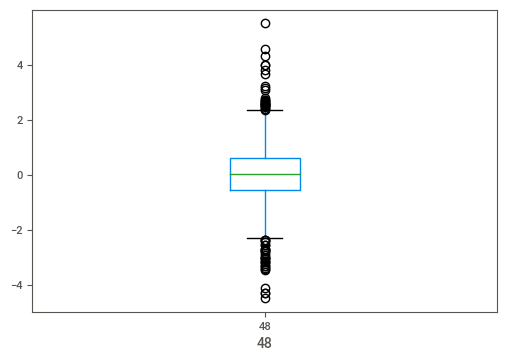

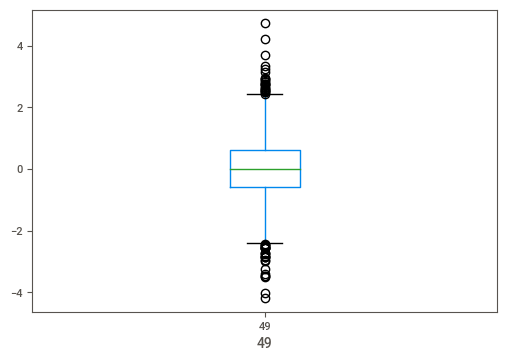

In [29]:
#checking outliers
numerical_features=[feature for feature in x.columns if x[feature].dtypes!='object']
for feature in numerical_features:
    
    x[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Model Building

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [42]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [43]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [45]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=mean_squared_error(y_test,pre)
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')

***************** KNeighborsClassifier *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.4729033428866405


cross_val_score  - 0.5082411700945709


rmse_score  - 0.025629707414829662


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.5057996090194501


cross_val_score  - 0.5483652099036214


rmse_score  - 0.024030149412239344


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.6384861317599873


cross_val_score  - 0.6394227161976066


rmse_score  - 0.017578359764482687


***************** DecisionTreeRegressor *******************


DecisionTreeRegr

In [46]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsClassifier,47.290334,0.025630,50.824117
1,SVR,50.579961,0.024030,54.836521
2,LinearRegression,63.848613,0.017578,63.942272
3,DecisionTreeRegressor,28.779110,0.034631,24.463620
4,GradientBoostingRegressor,61.420813,0.018759,62.089285
5,AdaBoostRegressor,33.424096,0.032372,41.259240
6,RandomForestRegressor,58.020056,0.020412,55.748279
7,XGBRegressor,58.035202,0.020405,57.314779


In [36]:
#hence 	GradientBoostingRegressor is the best performing Algorithm for the taken dataset.
#But our target score is 90%
#to achieve 90% score we will apply Gridsearchcv technique to the top3 performing models.

In [37]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.
#Then Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.

# Finding the best random_state for all models

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [48]:
print('knn',maxr2_score(knn,x,y))
print('svr',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   55   which is   0.5622146755398685
knn 55
max_r2_score is at random_state   55   which is   0.6271378987008671
svr 55
max_r2_score is at random_state   98   which is   0.6917643548980976
lr 98
max_r2_score is at random_state   80   which is   0.39360266431019086
dt 80
max_r2_score is at random_state   98   which is   0.6758865099554081
gbm 98
max_r2_score is at random_state   98   which is   0.6152321298218659
rfr 98
max_r2_score is at random_state   60   which is   0.6276061768519259
xgb 60
max_r2_score is at random_state   100   which is   0.5093402558018492
ada 100


# GridsearchCV

# model2->GradientBoostingRegressor(random_state=98)=67.58%

In [51]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
gbm=GradientBoostingRegressor()

In [52]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbm,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98)
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=100)
gbm.fit(x,y)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.9447440218484638
RMSE score=  0.05568131487775979


In [54]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
gbm=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=100)
gbm.fit(x,y)
cvs=cross_val_score(gbm,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6184460407014472


# model3->XGBoost(random_state=60)=62.76%

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)
xgb=XGBRegressor()

In [57]:
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.45,0.46,0.44,0.5],'max_depth':[3,4,5,6,7,8,9,10],'colsample_bytree':[0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4}

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=4)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.8801612058798696
RMSE score=  0.08207280271969358


In [61]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=4)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6287831808273926


# Saving the final XGBoost model

In [60]:
#From all the model tried above XGBoostRegressor model has highest cross_val_score=63.33% .
#Hence saving the XGBoostRegressor model as our final model
#corresponding random_state=60
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=4)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.8801612058798696
RMSE score=  0.08207280271969358


In [62]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=4)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6287831808273926


In [63]:
from sklearn.externals import joblib
joblib.dump(xgb,'practiceproject_20.obj')

['practiceproject_20.obj']

In [64]:
model=joblib.load('practiceproject_20.obj')

In [67]:
test=model.predict(x_test)
test[:10]

array([0.61677915, 0.59662676, 0.24910378, 0.82305896, 0.07557866,
       0.9654944 , 0.08884481, 0.08335862, 0.12885305, 0.10196069],
      dtype=float32)

# Saving final predictions in file.csv

In [68]:
final_predictions=pd.DataFrame(test,columns=['ViolentCrimesPerPop'])

In [69]:
final_predictions.to_csv('E:\\final_predictionsViolentCrimesPerPop.csv',index=False)

# Conclusion:-

In [ ]:
ViolentCrimesPerPop can be predicted using the model above. 
By using sklearn(XGBoostRegressor)we have build a machine learning model that will us predict ViolentCrimesPerPop.
Higher the score,higher the crime rate.
